# Interview Task for Machine Learning Engineer / Data Scientist Role
## Instructions

**Data**

The data set contains rental property listings from a real estate platform with related information, such as living area size, rent, the location (street and house number, if available, ZIP code and state), type of energy etc. It also has two variables containing longer free text descriptions: description with a text describing the offer and facilities describing all available facilities, newest renovation etc. 

**Task**

- 1. Please train a machine learning model to predict the total rent using only the structural data (without “description” and “facilities” fields).  
- 2. Please train a machine learning model to predict the total rent using both the structural data AND text data (“description” and “facilities” fields). 

We expect the performance reporting to conform to the expected ML best practices, i.e. please split the data set to necessary groups (train, validation, test). 

One can ignore some of the fields during prediction. Please provide some discussion on the feature processing, model selection, model performance and comparison of two models and any possible improvements. Please provide the trained ML model files as well.

We expect a git repo (link shared privately with us) that contains your solution in Python 3 language.

Additional points will be considered for DB schema design and access (postgreSQL preferred), model versioning, containerization, CI/CD and testing.

**Author information**:

Fernando Pozo

- [GitHub (github.com/fpozoc)](https://github.com/fpozoc)
- [Homepage (fpozoc.com)](https://fpozoc.com)

## Solution overview

![schema](../img/task.png "Title")

**Figure**: ML-engineer-interview-task solution. On the left side, the process of getting the training set for the first task is presented. In green, the NLP preprocessing and the dataset construction is shown. On the left side, the pipeline for the model training is presented. Finally, at the bottom, there are additional hints on the model and package deployment process.

The initial database `immo_data.csv` contains  268850 records and 36 features of real estate data from Germany.

The tasks to be performed here were split into two main parts:
- The first part in which only continuous, categorical, and boolean values from the initial dataset were used to construct a training set for the selected Machine Learning model. The objective was to predict the total rent of the property with a regression model. For this task, spatial data like names of states, cities, regions, zip codes and streets were discarded, but it is important to say that using these geographical coordinates can improve the model performance. Both `notebooks/01.eda.ipynb`, `src/data`, `src/features`  contains the code to perform this task.
- The second part, both `description` and `facilities` features are allowed to be added to the model. The objective was the same as before but this time, I can use this text data to predict the total rent of the property.
- All the code I have used to perform the previous task and for training the model has been saved in this repository. The `project_structure` can be found below. This has been implemented following the best routines for packaging, CI/CD, testing, linting, containerization, setup and even further deployment, model versioning, and correct documentation.

### Task 1

On the one hand, to create the training set for task 1, I used the following steps:
- **Data exploration** or EDA, where I took the opportunity to understand better every single feature to be used with optimal performance in the further model. Apart from `pandas`, `numpy`, and `matplotlib`, I used the `DataPrep` package to explore the data and to perform some basic data cleaning. The HTML preprocessing and postprocessing can be found in `reports` folder. Features description can be found grouped and sorted in `config/features.csv` or `config/features.yaml` files.
- **Data preprocessing** to remove some not-useful features with NANs and houses without `totalRent` (15.07% of the total) info available. I added a special ID with some house features to be used as a reference for the model. Finally, I removed the spatial data for this model.
- **Feature engineering** to transform the data to be used with the model. First, I converted the booleans (True/False) into integers (1/0), and then I transformed some categorical variables into dummy variables (One Hot Encoding). Notice that this step was performed considering every feature previously explored. For instance, I defined the `energyEfficiencyClass` in a way to be used by the model for the best performance (representing only three groups: A, B, and C). Details for other features can be found in `notebooks/01.eda.ipynb`.
- **Feature selection** to get the optimal number of predictive features for the model. The correlation matrix adds valuable insights into this process.
- I got **199339 instances + 42 more intelligent features** ready for task 1 after previous steps.
- **Model training** and **model selection** to train the model with the selected features. The model that achieved the best performance was the `XGBRegressor` model. To make this model selection, I used the `GridSearchCV` function, and I designed a strategy to follow a Nested Cross-Validation for selecting the optimal set of hyperparameters and to get the best model for this task. Other models like `DecisionTreeRegressor`, `RandomForestRegressor` or `GradientBoostingRegressor` were also tested. It is important to say that setting more models and a higher space of hyperparameters to be explored can improve the final model performance. This is why I have prepared in `src/model/model_selection.py` a complete script for doing this.
- **Model evaluation** and **model interpretation** to evaluate with different metrics evaluation and interpret how our model is running. The `ExplainerDashboard` package released an amazing HTML notebook for this exploration. The notebook can be found in `reports/interpretation.model.v1.0.0.html`.
- **Model persistence** to save the model in a file. The model can be used in the future to predict the total rent of the property. Now I have desinged a script to do this and also, to manually capture all the model logs. However, it is interesting to integrate it in a platform like Weight and Biases or MLflow to build better models at large scale.


### Task 2

On the other hand, I used the following steps to create the training set for task 2. In this step, text files were allowed, and the objective was to analyze features in the text data.
- **Language translation** was necessary to translate the text data into English. Most of the Natural Language Processing models have been optimized for this language. Therefore, I used the `deep-translator` Python library to get as much information as possible to perform a batch translation.
- **Sentence preprocessing** to prepare the text data for the translations and further Sentiment Analysis. Removing NANs, punctuation, stopwords, special characters were performed. In the following pipelines, both Tokenization, Stemming, and Lemmatization were performed.
- **Sentiment Analysis** to identify, extract, quantify, and study affective states and personal information. I have included different pipelines in the model to capture as much heterogeneity as possible. First, I added `FinBert`, a pre-trained NLP model to analyze the sentiment of the financial text. Moreover, I used the `TextBlob` library to analyze the sentiment of the text. This package provides a score for polarity (the orientation of the expressed sentiment) and subjectivity (personal opinion or not). Finally, I used the `VADER` (Valence Aware Dictionary and sEntiment Reasoner) library to use the compound score (a standardized score for measuring positive, neutral, or negative opinions in the same value).
- I got **8 extra features** ready for task 2 after the previous steps. This adds some additional features to the model that can predict the target and add precious information.


### Extra requirements

Finally, this repository includes a packaged version of the code (with complete documentation of the every function) to reproduce all this steps, reports and jupyter notebooks. Documentation can be further generated from this package. Some testing functions have been added and there are some CI/CD pipelines to be executed after pushing the code to the repository. Some docker images (for testing and production) have been created to run the code in a container. A Makefile is included to run the code in a production environment. Also, a linter (flake8) has been added to the code to check for any potential issues.

### Improvements

As I have already described, some improvements can be made to the model in the following steps. For instance, spatial data with coordinates can be beneficial here to add features like available living space, weather, trendy neighborhoods, population density, industries, services, etc. These features can be inferred from geographical information and could theoretically influence the total rent of a house. Also, complete testing of all functions, some extra CI/CD configurations, and a complete documentation can be added to this repository. To perform the model tracking, platforms like MLflow, Neptune or Weight and Biases can be used (I implemented it before [here](https://github.com/fpozoc/cxr-img-classifier/tree/main/configs/logger)). It also could be attractive to Fine-tuning a BERT model after some data labeling. Here I have used the fine-tuned model for financial text analysis to make it with our data should be beneficial.

# Exploratory Data Analysis

### Python packages: installation and importing

In [1]:
# python modules
import sys

# 3rd partymodules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings

sys.path.append('../')
from src.utils.utils import *
from src.visualization.figures import *
from src.features.text import *

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

%load_ext autoreload
%autoreload 2

!pwd

ModuleNotFoundError: No module named 'src.visualization'

### Classes and functions used for this notebook

### Data paths

In [ ]:
DATA_PATH = "../data/raw/immo_data.csv"
FEATURES_PATH = "../config/features.yaml"

## Data collection

#### Data loading and id creation for further SQL database annotation

In [ ]:
df = pd.read_csv(DATA_PATH, lineterminator='\n') # error with this file reported here https://stackoverflow.com/questions/33998740/error-in-reading-a-csv-file-in-pandascparsererror-error-tokenizing-data-c-err
df['idx'] = range(1, len(df) + 1)
df.insert(0, 'id', [f"{idx}.{totalRent} - {street} {houseNumber} {floor} ({town} - {city}, {state})" 
            for idx, state, city, town, street, houseNumber, floor, totalRent in zip(
                df['idx'], df['regionLevel1'], df['regionLevel2'], df['regionLevel3'], df['street'], df['houseNumber'], df['floor'], df['totalRent'])])
df = df.drop('idx', axis=1)
df_test = df.head(15)

In [ ]:
test = pd.DataFrame(
    {
    'telekomUploadSpeed': [40.0, None, 2.4, 40.0],
    'totalRent': [693.16, 1545.8, 226.0, 425.0],
    'yearConstructed': [1967.0, 2018.0, 1973.0, 1928000.0],
    }
)

In [ ]:
remove_outliers_by_quantile(test, col='yearConstructed')

,telekomUploadSpeed,totalRent,yearConstructed
0,40.0,693.16,1967.0
1,NaN,1545.80,2018.0
2,2.4,226.00,1973.0


ID generation for further identification

In [ ]:
# df[['id', 'description', 'facilities']].to_csv('../data/interim/immo_data_description.csv', index=False)

In [ ]:
df.sample(5)

,id,regionLevel1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,telekomUploadSpeed,totalRent,yearConstructed,noParkSpaces,firingTypes,kitchen,cellar,houseNumber,livingSpace,condition,interiorQuality,petsAllowed,street,lift,typeOfFlat,postcode,noRooms,floor,numberOfFloors,garden,regionLevel2,regionLevel3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice
20176,20177.2509.0 - Merbitzer_Straße 55 nan (Briesn...,Sachsen,316.0,NaN,ONE_YEAR_FREE,NaN,False,True,10.0,2509.00,NaN,1.0,NaN,False,True,55,175.41,first_time_use,NaN,NaN,Merbitzer_Straße,True,roof_storey,1157,5.0,NaN,NaN,False,Dresden,Briesnitz,Das Haus ist ein Baudenkmal. Es ist kein Energ...,- Erstbezug - das bestehende Fabrikgebäude wur...,NaN,NaN,NaN,NaN,NaN
181594,181595.499.0 - Stiftsstraße 7 1.0 (Sonnenberg ...,Sachsen,152.0,central_heating,ONE_YEAR_FREE,10.0,False,True,2.4,499.00,1997.0,NaN,district_heating,False,True,7,69.40,well_kept,NaN,negotiable,Stiftsstraße,True,apartment,9130,3.0,1.0,4.0,False,Chemnitz,Sonnenberg,Die Wohnung befindet sich im 1. Obergeschoss e...,Hier können Sie sich hübsch einrichten! Die Wo...,NaN,B,NaN,NaN,NaN
224485,224486.824.61 - Mausgarten 42 0.0 (Kleve - Kle...,Nordrhein_Westfalen,240.0,central_heating,ONE_YEAR_FREE,NaN,False,True,40.0,824.61,1996.0,1.0,gas,False,True,42,89.94,well_kept,NaN,no,Mausgarten,True,ground_floor,47533,3.0,0.0,3.0,True,Kleve_Kreis,Kleve,In einem ruhigen und gepflegten Mehrfamilienha...,"3 Zimmer, Küche, Diele, Bad, Gäste-WC,\nTerras...",NaN,NaN,NaN,NaN,NaN
173085,173086.nan - Scheffelstr. 33 1.0 (Ochsenhausen...,Baden_Württemberg,50.0,central_heating,ONE_YEAR_FREE,NaN,False,False,10.0,NaN,1965.0,1.0,oil,True,False,33,55.00,modernized,normal,NaN,Scheffelstr.,False,roof_storey,88416,2.5,1.0,2.0,False,Biberach_Kreis,Ochsenhausen,Dachgeschoßwohnung in ruhiger Lage,Standard,90.0,NaN,NaN,NaN,NaN
204760,204761.1560.0 - Dresdner_Straße 9A nan (Zentru...,Sachsen,335.0,floor_heating,NaN,NaN,True,True,NaN,1560.00,2018.0,1.0,NaN,False,False,9A,129.14,first_time_use,NaN,negotiable,Dresdner_Straße,True,apartment,4103,4.0,NaN,6.0,False,Leipzig,Zentrum_Ost,Die hier angebotene Wohnung befindet sich im 4...,- Echtholzparkett in den Wohnräumen\n- Schöne ...,NaN,NaN,NaN,NaN,NaN


Loading features

In [ ]:
df_features = pd.DataFrame(parse_yaml(FEATURES_PATH))
features = df_features['feature']
model_features = df_features.loc[df_features['group'].str.contains('billing|energy|communications|house|quality')]['feature'].values
target = 'totalRent'
df = df[['id']+list(features)]

In [ ]:
df.shape

(268850, 37)

We have 268850 houses with 36 features each one

In [ ]:
# report = create_report(df, title='Rental property listings')
# report.save('/home/fpozoc/Desktop/rent/eda')
# report.show_browser()

In [ ]:
df[features].describe()

,postcode,floor,serviceCharge,heatingCosts,electricityBasePrice,electricityKwhPrice,telekomHybridUploadSpeed,telekomUploadSpeed,yearConstructed,noParkSpaces,noRooms,livingSpace,numberOfFloors,lastRefurbish,totalRent
count,268850.000000,217541.000000,261941.000000,85518.000000,46846.000000,46846.000000,45020.0,235492.000000,211805.000000,93052.000000,268850.000000,268850.000000,171118.000000,80711.000000,2.283330e+05
mean,37283.022235,2.122405,151.206113,76.990866,89.113612,0.199769,10.0,28.804928,1966.400590,1.327634,2.641261,74.355548,3.572319,2013.904536,9.013315e+02
std,27798.037296,3.634934,308.295790,147.716278,5.395805,0.009667,0.0,16.337151,46.992207,8.361403,2.633440,254.759208,6.375496,10.963125,3.323833e+04
min,852.000000,-1.000000,0.000000,0.000000,71.430000,0.170500,10.0,1.000000,1000.000000,0.000000,1.000000,0.000000,0.000000,1015.000000,0.000000e+00
25%,9128.000000,1.000000,95.000000,54.000000,90.760000,0.191500,10.0,10.000000,1950.000000,1.000000,2.000000,54.000000,2.000000,2012.000000,4.698000e+02
50%,38667.000000,2.000000,135.000000,70.000000,90.760000,0.198500,10.0,40.000000,1973.000000,1.000000,3.000000,67.320000,3.000000,2017.000000,6.500000e+02
75%,57072.000000,3.000000,190.000000,90.000000,90.760000,0.205500,10.0,40.000000,1996.000000,1.000000,3.000000,87.000000,4.000000,2019.000000,9.850000e+02
max,99998.000000,999.000000,146118.000000,12613.000000,90.760000,0.227600,10.0,100.000000,2090.000000,2241.000000,999.990000,111111.000000,999.000000,2919.000000,1.575154e+07


In [ ]:
df_features

,group,feature,description,type,training,comments
0,spatial,regionLevel1,States in Germany (e.g. Nordrhein Westfalen (n...,object,not_included,Used to improve the data distribution in train...
1,spatial,regionLevel2,"Cities in Germany (e.g. Leipzig (n=13723), Che...",object,not_included,Informative but needs geospatial data
2,spatial,regionLevel3,"Towns in Germany (e.g. Innenstadt (n=4751), St...",object,not_included,Informative but needs geospatial data
3,address,houseNumber,Adress house number,object,not_included,Could be informative but needs geospatial data
4,address,street,Adress street,object,not_included,Informative but needs geospatial data
5,address,lift,Adress lift,bool,not_included,Could be informative but needs geospatial data
6,address,postcode,Adress postal code,int64,not_included,Could be informative but needs geospatial data
7,address,floor,Adress floor,float64,not_included,Info available at numberOfFloors
8,billing,serviceCharge,"Cost of heating, energy, internet (?)",float64,included,ok!
9,energy,heatingType,The type of heating system rent has (https://w...,object,tbd,many variables to be encoded. We can study if ...


In [ ]:
# [print(f"- `{feature}` ({group}): {description} ({ftype}) - {training} ({comments})") for group, feature, description, ftype, training, comments in zip(df_features['group'],df_features['feature'],df_features['description'],df_features['type'],df_features['training'],df_features['comments'])]

### Features description

- `regionLevel1` (spatial): States in Germany (e.g. Nordrhein Westfalen (n=62863), Sachsen (n=58154), Bayern (n=21609)) (object) - not_included (Used to improve the data distribution in train and test)
- `regionLevel2` (spatial): Cities in Germany (e.g. Leipzig (n=13723), Chemnitz (n=12575), Berlin (n=10406)) (object) - not_included (Informative but needs geospatial data)
- `regionLevel3` (spatial): Towns in Germany (e.g. Innenstadt (n=4751), Stadtmitte (n=2697), Altstadt (n=2334)) (object) - not_included (Informative but needs geospatial data)
- `houseNumber` (address): Adress house number (object) - not_included (Could be informative but needs geospatial data)
- `street` (address): Adress street (object) - not_included (Informative but needs geospatial data)
- `lift` (address): Adress lift (bool) - not_included (Could be informative but needs geospatial data)
- `postcode` (address): Adress postal code (int64) - not_included (Could be informative but needs geospatial data)
- `floor` (address): Adress floor (float64) - not_included (Info available at numberOfFloors)
- `serviceCharge` (billing): Cost of heating, energy, internet (?) (float64) - included (ok!)
- `heatingType` (energy): The type of heating system rent has (https://www.rentals.com/blog/pros-and-cons-of-different-types-of-home-heating-systems-in-a-rental-home/) (object) - tbd (many variables to be encoded. We can study if it could be useful for the model)
- `heatingCosts` (energy): The cost of heating type (float64) - False (67.96% of missing nan)
- `energyEfficiencyClass` (energy): Efficient class (e.g. C (n=14613), D (n=14130), B (n=11333)) (object) - tbd (many variables to be encoded. We can study if it could be useful for the model)
- `electricityBasePrice` (energy): Base price of electricity (float64) - False (82.72% of missing nan)
- `electricityKwhPrice` (energy): Kwh price of electricity (float64) - False (82.72% of missing nan)
- `firingTypes` (energy): Type of energies used in the building (object) - tbd (many variables to be encoded. We can study if it could be useful for the model)
- `telekomTvOffer` (communications): TV catalogue (PPV TV (?)) (object) - ohe (Variable has been One Hot Encoded)
- `telekomHybridUploadSpeed` (communications): Upload hybrid speed of Internet (float64) - False (Not enough information for modelling here)
- `telekomUploadSpeed` (communications): Upload speed of Internet (float64) - encoded (Variable has been Encoded in categories)
- `newlyConst` (house): If the house has been constructed in the last times (bool) - included (ok!)
- `balcony` (house): If the house has a balcony (bool) - included (ok!)
- `yearConstructed` (house): Year when the building was constructed (float64) - False (21.58% of nan)
- `noParkSpaces` (house): Number of parkings (float64) - False (variable distribution is strange. Nan is 66.04%)
- `noRooms` (house): Number of rooms (float64) - included (ok!)
- `kitchen` (house): If the building has a kitchen (bool) - included (ok!)
- `cellar` (house): If the building has a cellar (bool) - included (ok!)
- `garden` (house): If the building has a garden (bool) - included (ok!)
- `livingSpace` (house): Meters of livingSpace (float64) - included (ok!)
- `typeOfFlat` (house): Type of flat to live (e.g. apartment (n=131522), roof_storey (n=34787), ground_floor (n=31538)) (object) - ohe (Variable has been One Hot Encoded)
- `numberOfFloors` (house): Number of floors (float64) - encoded (Variable has been Encoded in categories)
- `condition` (quality): Type of condition (object) - ohe (Variable has been One Hot Encoded)
- `interiorQuality` (quality): Quality inside the rent Interior (object) - ohe (Variable has been One Hot Encoded)
- `petsAllowed` (quality): If the house allow for pets (object) - ohe (Variable has been One Hot Encoded)
- `lastRefurbish` (quality): Time of last refurbish (float64) - encoded (Variable has been Encoded in categories)
- `totalRent` (price): Total rent (float64) - False (variables to be predicted)
- `description` (nlp): House description (object) - False (Only used in task 2)
- `facilities` (nlp): House facilities (object) - False (Only used in task 2)

In [ ]:
df.description[0]

'Die ebenerdig zu erreichende Erdgeschosswohnung befindet sich in einem gepflegten 8-Familienhaus. Aufgrund der Hanglage bietet sich ein unverbaubarer Blick ins Grüne.'

In [ ]:
df.facilities[0]

'Die Wohnung ist mit Laminat ausgelegt. Das Badezimmer ist gefliest und verfügt über eine Wannendusche. Neue weiße Zimmertüren, ein Fliesenspiegel in der Küche und Fußleisten wurden kürzlich eingebaut.\nZur Wohnung gehört ein 10 m großer Keller. Eine Garage kann optional mitgemietet werden.'

### Initial exploration

Percentage of missing cells per column

In [ ]:
get_nan_percentages(df)

telekomHybridUploadSpeed    83.25
electricityBasePrice        82.58
electricityKwhPrice         82.58
energyEfficiencyClass       71.07
lastRefurbish               69.98
heatingCosts                68.19
noParkSpaces                65.39
petsAllowed                 42.62
interiorQuality             41.91
numberOfFloors              36.35
houseNumber                 26.42
street                      26.41
condition                   25.47
yearConstructed             21.22
firingTypes                 21.19
facilities                  19.69
floor                       19.08
heatingType                 16.68
totalRent                   15.07
typeOfFlat                  13.62
telekomUploadSpeed          12.41
telekomTvOffer              12.13
description                  7.34
serviceCharge                2.57
balcony                      0.00
newlyConst                   0.00
noRooms                      0.00
kitchen                      0.00
cellar                       0.00
garden        

## Data preprocessing

15.07 of the houses does not have the y target (`totalRent`). Therefore we remove from our dataset to train and evaluate

In [ ]:
df_model = df.loc[~df['totalRent'].isnull()]
df_house_without_rents = df.loc[df['totalRent'].isnull()]

### Feature selection and feature engineering

#### Feature: booleans

In [ ]:
df_model[df_model.select_dtypes('boolean').columns] = df_model.select_dtypes('boolean').astype(int)

#### Feature: telekomHybridUploadSpeed

In [ ]:
print(df_model['telekomHybridUploadSpeed'].value_counts())

10.0    37853
Name: telekomHybridUploadSpeed, dtype: int64


In [ ]:
df_model.loc[df_model['telekomHybridUploadSpeed'] == 10, 'telekomHybridUploadSpeed'] = 1
df_model.loc[df_model['telekomHybridUploadSpeed'] != 10, 'telekomHybridUploadSpeed'] = 0

#### Feature: heatingType

TBD is it is included in the model

In [ ]:
df_model.groupby(['heatingType'])['totalRent'].agg('median').sort_values(ascending=False).reset_index().round(2).head(15)

,heatingType,totalRent
0,floor_heating,1185.20
1,heat_pump,1100.00
2,combined_heat_and_power_plant,1086.00
3,solar_heating,1030.00
4,wood_pellet_heating,990.00
5,oil_heating,750.00
6,gas_heating,690.00
7,self_contained_central_heating,607.00
8,central_heating,600.00
9,district_heating,585.00


In [ ]:
df_model.groupby(['heatingType'])['totalRent'].agg('count').sort_values(ascending=False).reset_index().round(2).head(15)

,heatingType,totalRent
0,central_heating,109787
1,district_heating,21310
2,gas_heating,18270
3,floor_heating,15662
4,self_contained_central_heating,14764
5,oil_heating,4583
6,heat_pump,2217
7,combined_heat_and_power_plant,1776
8,night_storage_heater,1140
9,wood_pellet_heating,866


In [ ]:
df_model['heatingType'].value_counts()

central_heating                   109787
district_heating                   21310
gas_heating                        18270
floor_heating                      15662
self_contained_central_heating     14764
oil_heating                         4583
heat_pump                           2217
combined_heat_and_power_plant       1776
night_storage_heater                1140
wood_pellet_heating                  866
electric_heating                     733
stove_heating                        252
solar_heating                        150
Name: heatingType, dtype: int64

#### Feature: energyEfficiencyClass

- Class A
- Class B 
- Class C or lower

In [ ]:
df_model.groupby(['energyEfficiencyClass'])['totalRent'].agg('median').sort_values(ascending=False).reset_index().round(2).head(15)

,energyEfficiencyClass,totalRent
0,A_PLUS,1180.00
1,A,1130.00
2,B,810.00
3,NO_INFORMATION,658.00
4,F,632.43
5,E,620.00
6,G,607.11
7,H,606.69
8,D,582.25
9,C,540.00


In [ ]:
df_model['energyEfficiencyClass'].value_counts()

NO_INFORMATION    12806
C                 12296
D                 11522
B                  9463
E                  6290
A                  3999
F                  3453
A_PLUS             2777
G                  1304
H                   633
Name: energyEfficiencyClass, dtype: int64

In [ ]:
df_model['energyEfficiencyClass'] = df_model['energyEfficiencyClass'].replace('NO_INFORMATION', 'C_OR_LOWER')
df_model['energyEfficiencyClass'] = df_model['energyEfficiencyClass'].replace(np.nan, 'C_OR_LOWER')
df_model.loc[df_model['energyEfficiencyClass'] == 'A_PLUS', 'energyEfficiencyClass'] = 'A'
df_model.loc[df_model['energyEfficiencyClass'].str.contains('F|E|G|H|D|C', na=False), 'energyEfficiencyClass'] = 'C_OR_LOWER'
df_energyEfficiencyClass = pd.get_dummies(df_model['energyEfficiencyClass'], prefix='energyEfficiencyClass')
df_energyEfficiencyClass.sample(5)

,energyEfficiencyClass_A,energyEfficiencyClass_B,energyEfficiencyClass_C_OR_LOWER
61171,0,0,1
21030,0,0,1
196387,0,0,1
51554,0,1,0
192955,0,0,1


#### Feature: firingTypes

TBD is it is included in the model


In [ ]:
df_model[~df_model['firingTypes'].str.contains(':', na=False)].groupby(['firingTypes'])['totalRent'].agg('median').sort_values(ascending=False).reset_index().round(2).head(15)

,firingTypes,totalRent
0,hydro_energy,1288.00
1,combined_heat_and_power_regenerative_energy,1221.32
2,environmental_thermal_energy,1140.00
3,combined_heat_and_power_renewable_energy,1130.00
4,wind_energy,1127.50
5,geothermal,1100.00
6,solar_heating,1047.50
7,bio_energy,1040.00
8,combined_heat_and_power_fossil_fuels,1017.93
9,pellet_heating,1015.00


In [ ]:
df_model['firingTypes'].value_counts()

gas                                                                                                  93567
district_heating                                                                                     42782
oil                                                                                                  15202
natural_gas_light                                                                                     8753
electricity                                                                                           3892
                                                                                                     ...  
solar_heating:heat_supply                                                                                1
geothermal:solar_heating:pellet_heating:gas                                                              1
gas:oil:electricity                                                                                      1
district_heating:combined_heat_and_po

#### Feature: telekomTvOffer

In [ ]:
df_model.groupby(['telekomTvOffer'])['totalRent'].agg('median').sort_values(ascending=False).reset_index().round(2).head(15)

,telekomTvOffer,totalRent
0,ONE_YEAR_FREE,630.00
1,NONE,600.41
2,ON_DEMAND,579.00


In [ ]:
df['telekomTvOffer'].value_counts()

ONE_YEAR_FREE    227632
NONE               4957
ON_DEMAND          3642
Name: telekomTvOffer, dtype: int64

In [ ]:
df_model['telekomTvOffer'] = df_model['telekomTvOffer'].replace('NONE', np.nan)
df_telekomTvOffer = pd.get_dummies(df_model['telekomTvOffer'], prefix='telekomTvOffer', dummy_na=True)
df_telekomTvOffer.sample(5)

,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,telekomTvOffer_nan
232432,1,0,0
4551,1,0,0
99380,1,0,0
188925,0,0,1
194359,0,0,1


#### Feature: typeOfFlat

- penthouse
- loft_or_maisonette
- terraced_flat 
- other

In [ ]:
df_model.groupby(['typeOfFlat'])['totalRent'].agg('median').sort_values(ascending=False).reset_index().round(2).head(15)

,typeOfFlat,totalRent
0,penthouse,1615.40
1,loft,1249.75
2,maisonette,1130.00
3,terraced_flat,1055.00
4,ground_floor,650.00
5,apartment,647.56
6,roof_storey,627.00
7,raised_ground_floor,623.00
8,other,620.00
9,half_basement,600.00


In [ ]:
df_model['typeOfFlat'].value_counts()

apartment              111097
roof_storey             29852
ground_floor            27030
other                    8570
maisonette               7856
raised_ground_floor      5033
terraced_flat            2914
penthouse                2858
half_basement            1761
loft                      806
Name: typeOfFlat, dtype: int64

In [ ]:
df_model['typeOfFlat'] = df_model['typeOfFlat'].fillna('other')
df_model.loc[df_model['typeOfFlat'].str.contains('ground_floor|apartment|roof_storey|raised_ground_floor|other|half_basement', na=False), 'typeOfFlat'] = 'non_luxury_type'
df_typeOfFlat = pd.get_dummies(df_model['typeOfFlat'], prefix='typeOfFlat')
df_typeOfFlat.sample(5)

,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_non_luxury_type,typeOfFlat_penthouse,typeOfFlat_terraced_flat
128150,0,0,1,0,0
73085,0,0,1,0,0
168450,0,0,1,0,0
235252,0,0,1,0,0
124899,0,0,1,0,0


#### Feature: condition

TBD is it is included in the model


Removing ripe for demolition from model (only 4 instances)

In [ ]:
df_model.groupby(['condition'])['totalRent'].agg('median').sort_values(ascending=False).reset_index().round(2).head(15)

,condition,totalRent
0,first_time_use,1200.00
1,mint_condition,1000.00
2,ripe_for_demolition,959.25
3,first_time_use_after_refurbishment,801.00
4,modernized,630.00
5,well_kept,600.00
6,fully_renovated,590.00
7,need_of_renovation,541.00
8,negotiable,527.00
9,refurbished,510.00


In [ ]:
df_model['condition'].value_counts()

well_kept                             55573
refurbished                           24556
fully_renovated                       22529
mint_condition                        18984
first_time_use                        18150
modernized                            14834
first_time_use_after_refurbishment    13751
negotiable                             1833
need_of_renovation                     1139
ripe_for_demolition                       4
Name: condition, dtype: int64

In [ ]:
# df_model = df_model.loc[df_model['condition'] != 'ripe_for_demolition']

#### Feature: interiorQuality

- luxury
- sophisticated
- normal_simple

In [ ]:
df_model.groupby(['interiorQuality'])['totalRent'].agg('median').sort_values(ascending=False).reset_index().round(2).head(15)

,interiorQuality,totalRent
0,luxury,1545.00
1,sophisticated,969.43
2,normal,540.00
3,simple,495.00


In [ ]:
df_model.loc[df_model['interiorQuality'] == 'simple', 'interiorQuality'] = 'normal'
df_model.loc[df_model['interiorQuality'] == 'sophisticated', 'interiorQuality'] = 'not_luxury'
df_interiorQuality = pd.get_dummies(df_model['interiorQuality'], prefix='interiorQuality', dummy_na=True)
df_interiorQuality.sample(5)

,interiorQuality_luxury,interiorQuality_normal,interiorQuality_not_luxury,interiorQuality_nan
177057,0,1,0,0
70002,0,0,0,1
44501,0,1,0,0
155827,0,0,0,1
85665,0,1,0,0


#### Feature: petsAllowed

- no
- yes_or_negotiable

In [ ]:
df_model.groupby(['petsAllowed'])['totalRent'].agg('median').sort_values(ascending=False).reset_index().round(2).head(15)

,petsAllowed,totalRent
0,no,800.00
1,negotiable,609.00
2,yes,586.72


In [ ]:
df_model.petsAllowed.value_counts()

negotiable    79413
no            44393
yes            9175
Name: petsAllowed, dtype: int64

In [ ]:
df_model['petsAllowed'] = df_model['petsAllowed'].fillna('no')
df_model.loc[df_model['petsAllowed'].str.contains('negotiable|yes'), 'petsAllowed'] = 'yes'
df_petsAllowed = pd.get_dummies(df_model['petsAllowed'], prefix='petsAllowed')
df_petsAllowed.sample(5)

,petsAllowed_no,petsAllowed_yes
53223,1,0
64998,1,0
154637,1,0
248587,1,0
260168,1,0


In [ ]:
# df_model['numberOfFloors'] = df_model['numberOfFloors'].astype(float)
df_model.loc[df_model['numberOfFloors'] >= 5, 'numberOfFloors'] = 'more_than_5'
df_model.loc[df_model['numberOfFloors'] == 4, 'numberOfFloors'] = '4'
df_model.loc[df_model['numberOfFloors'] == 3, 'numberOfFloors'] = '3'
df_model.loc[df_model['numberOfFloors'] == 2, 'numberOfFloors'] = '2'
df_model.loc[df_model['numberOfFloors'] == 1, 'numberOfFloors'] = '1'
df_model.loc[df_model['numberOfFloors'] == 0, 'numberOfFloors'] = '0'
df_numberOfFloors = pd.get_dummies(df_model['numberOfFloors'], prefix='numberOfFloors', dummy_na=True)
df_numberOfFloors.sample(5)

,numberOfFloors_0,numberOfFloors_1,numberOfFloors_2,numberOfFloors_3,numberOfFloors_4,numberOfFloors_more_than_5,numberOfFloors_nan
142450,0,0,0,0,1,0,0
183476,0,0,0,1,0,0,0
154574,0,0,0,0,0,0,1
136582,1,0,0,0,0,0,0
65081,0,0,0,1,0,0,0


#### Feature: lastRefurbish

In [ ]:
df_model['lastRefurbish'].value_counts().head()

2019.0    18039
2018.0    11832
2017.0     6514
2016.0     5236
2015.0     4180
Name: lastRefurbish, dtype: int64

In [ ]:
up_dates = df_model[df_model['lastRefurbish'] > 2022]['lastRefurbish'].values
down_dates = df_model[df_model['lastRefurbish'] < 1850]['lastRefurbish'].values
df_model = df_model[~df_model.lastRefurbish.isin(up_dates+down_dates)]

In [ ]:
df_model.loc[df_model['lastRefurbish'] < 1950, 'lastRefurbish_cat'] = 'very old'
df_model.loc[(df_model['lastRefurbish'] > 1950) & (df_model['lastRefurbish'] < 2000), 'lastRefurbish_cat'] = 'old'
df_model.loc[(df_model['lastRefurbish'] > 2000) & (df_model['lastRefurbish'] < 2015), 'lastRefurbish_cat'] = 'new'
df_model.loc[(df_model['lastRefurbish'] > 2015), 'lastRefurbish_cat'] = 'very new'
df_lastRefurbish = pd.get_dummies(df_model['lastRefurbish_cat'], prefix='lastRefurbish_cat', dummy_na=True)
df_lastRefurbish.sample(5)

,lastRefurbish_cat_new,lastRefurbish_cat_old,lastRefurbish_cat_very new,lastRefurbish_cat_very old,lastRefurbish_cat_nan
166014,0,0,1,0,0
246449,0,0,1,0,0
70333,0,1,0,0,0
181714,0,0,0,0,1
141989,1,0,0,0,0


#### Feature: telekomUploadSpeed

In [ ]:
df_model['telekomUploadSpeed'].value_counts()

40.0     135327
2.4       36090
10.0      27614
5.0         889
1.0         182
100.0       132
4.0          49
Name: telekomUploadSpeed, dtype: int64

In [ ]:
df_model.loc[df_model['telekomUploadSpeed'] >= 40, 'telekomUploadSpeed_cat'] = 'fast'
df_model.loc[df_model['telekomUploadSpeed'] < 40, 'telekomUploadSpeed_cat'] = 'slow'
df_telekomUploadSpeed = pd.get_dummies(df_model['telekomUploadSpeed_cat'], prefix='telekomUploadSpeed_cat', dummy_na=True)

#### Feature: numberOfFloors

In [ ]:
df_model['numberOfFloors'].value_counts().head()

3              44122
4              35393
2              31776
more_than_5    29442
1               7001
Name: numberOfFloors, dtype: int64

#### Exploring spatial features: state, region, city and street

I will label top 5 states, regions, cities, and top 50 streets

In [ ]:
streets = df_model.groupby(['street'])['totalRent'].agg('median').sort_values(ascending=False).reset_index()
streets_top6 = list(streets.head(6)['street'].values)

cities = df_model.groupby(['regionLevel3'])['totalRent'].agg('median').sort_values(ascending=False).reset_index()
cities_top10 = list(cities.head(6)['regionLevel3'].values)

regions = df_model.groupby(['regionLevel2'])['totalRent'].agg('median').sort_values(ascending=False).reset_index()
regions_top = list(regions[regions['totalRent'] > 1400]['regionLevel2'].values)

states = df_model.groupby(['regionLevel1'])['totalRent'].agg('median').sort_values(ascending=False).reset_index()
states_top = list(states[states['totalRent'] > 1000]['regionLevel1'].values)

In [ ]:
regions.head(20)

,regionLevel2,totalRent
0,München,1700.00
1,Freiburg_im_Breisgau,1550.00
2,Starnberg_Kreis,1500.00
3,München_Kreis,1467.50
4,Stuttgart,1400.00
5,Frankfurt_am_Main,1400.00
6,Miesbach_Kreis,1300.00
7,Heidelberg,1290.00
8,Böblingen_Kreis,1250.00
9,Ebersberg_Kreis,1241.50


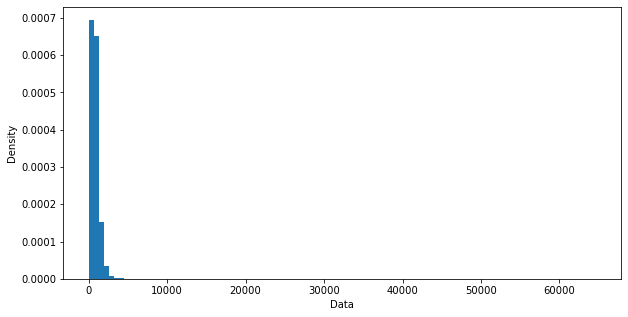

In [ ]:
plot_histogram(streets['totalRent'], bins=100)

In [ ]:
streets.head(5)

,street,totalRent
0,Schaller_Str.,64651.00
1,Ufnaustr._,51570.00
2,G._Hauptmann_Str.,31919.74
3,Potsdamer_Platz,26500.00
4,Oeltzenstraße,19519.00


#### Removing non predictive values

- `regionLevel1`: informative but needs geospatial data
- `regionLevel2`: informative but needs geospatial data
- `regionLevel3`: informative but needs geospatial data
- `houseNumber`: could be informative but needs geospatial data
- `street`: informative but needs geospatial data
- `postcode`: could be informative but needs geospatial data
- `floor`: info available at numberOfFloors
- `heatingCosts`: 67.96% of missing nan
- `heatingType`: many variables to be encoded
- `electricityBasePrice`: 82.72% of missing nan
- `electricityKwhPrice`: 82.72% of missing nan
- `energyEfficiencyClass`: many variables to be encoded
- `noParkSpaces`: variable distribution is strange
- `yearConstructed`: 21.58% of missing nan
- `description`: not allowed in this part
- `facilities`: not allowed in this part

In [ ]:
get_nan_percentages(df_model.select_dtypes(include=['float64', 'int']))

electricityBasePrice        82.72
electricityKwhPrice         82.72
lastRefurbish               68.11
heatingCosts                67.96
noParkSpaces                66.04
yearConstructed             21.58
floor                       17.68
telekomUploadSpeed          12.28
serviceCharge                1.79
lift                         0.00
kitchen                      0.00
livingSpace                  0.00
garden                       0.00
cellar                       0.00
balcony                      0.00
noRooms                      0.00
postcode                     0.00
newlyConst                   0.00
telekomHybridUploadSpeed     0.00
totalRent                    0.00
dtype: float64

In [ ]:
df_final = pd.concat([df_model[df_features[df_features['training'].str.contains('^included$', na=False)]['feature'].values], 
                      df_energyEfficiencyClass,
                      df_telekomTvOffer, 
                      df_typeOfFlat, 
                      df_interiorQuality, 
                      df_petsAllowed, 
                      df_numberOfFloors, 
                      df_lastRefurbish, 
                      df_telekomUploadSpeed], axis=1)
df_final['noRooms'] = df_final['noRooms'].astype(int)
df_final = pd.merge(df[['id', 'totalRent']], df_final, left_index=True, right_index=True)

### Missing values

#### MICE (Iterative imputer)
https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer

It was discarded because there are not enough value to provide a good imputation here.

In [ ]:
# df_for_impute = df_final[['serviceCharge', 'energyEfficiencyClass_A', 'livingSpace', 'noRooms', 'kitchen', 'cellar', 'garden', 'balcony', 'newlyConst']]

# imp = IterativeImputer(max_iter=10000, random_state=15)
# imp.fit(df_for_impute.loc[~df_for_impute['serviceCharge'].isnull()])
# imputed_values = imp.transform(df_for_impute)
# df_imputed = pd.DataFrame(imputed_values, columns=['serviceCharge', 'energyEfficiencyClass_A', 'livingSpace', 'noRooms', 'kitchen', 'cellar', 'garden', 'balcony', 'newlyConst'])

# df_final = df_final.reset_index(drop=True)
# df_final['serviceCharge'] = df_imputed['serviceCharge']

In [ ]:
df_final = df_final.loc[~df_final['serviceCharge'].isnull()]

In [ ]:
get_nan_percentages(df_final)

id                                  0.0
numberOfFloors_4                    0.0
interiorQuality_not_luxury          0.0
interiorQuality_nan                 0.0
petsAllowed_no                      0.0
petsAllowed_yes                     0.0
numberOfFloors_0                    0.0
numberOfFloors_1                    0.0
numberOfFloors_2                    0.0
numberOfFloors_3                    0.0
numberOfFloors_more_than_5          0.0
totalRent                           0.0
numberOfFloors_nan                  0.0
lastRefurbish_cat_new               0.0
lastRefurbish_cat_old               0.0
lastRefurbish_cat_very new          0.0
lastRefurbish_cat_very old          0.0
lastRefurbish_cat_nan               0.0
telekomUploadSpeed_cat_fast         0.0
telekomUploadSpeed_cat_slow         0.0
interiorQuality_normal              0.0
interiorQuality_luxury              0.0
typeOfFlat_terraced_flat            0.0
typeOfFlat_penthouse                0.0
serviceCharge                       0.0


### Handling outliers
https://stackoverflow.com/questions/17725927/boxplots-in-matplotlib-markers-and-outliers

In [ ]:
df_final.describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
totalRent,224243.0,892.134952,33372.026100,0.0,469.00,648.13,980.0,15751535.0
serviceCharge,224243.0,151.423054,326.320957,0.0,95.48,136.00,190.0,146118.0
livingSpace,224243.0,73.214572,145.958021,0.0,54.00,67.00,86.0,66100.0
noRooms,224243.0,2.575724,1.732402,1.0,2.00,3.00,3.0,560.0
telekomUploadSpeed_cat_fast,224243.0,0.593838,0.491117,0.0,0.00,1.00,1.0,1.0
petsAllowed_yes,224243.0,0.391910,0.488178,0.0,0.00,0.00,1.0,1.0
petsAllowed_no,224243.0,0.608090,0.488178,0.0,0.00,1.00,1.0,1.0
interiorQuality_nan,224243.0,0.385372,0.486684,0.0,0.00,0.00,1.0,1.0
balcony,224243.0,0.619462,0.485520,0.0,0.00,1.00,1.0,1.0
cellar,224243.0,0.649202,0.477221,0.0,0.00,1.00,1.0,1.0


#### Feature: noRooms

<AxesSubplot:>

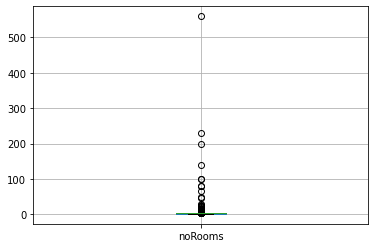

In [ ]:
df_final.boxplot('noRooms')

In [ ]:
df_final[df_final['noRooms'] > 100]

,id,totalRent,serviceCharge,newlyConst,balcony,noRooms,kitchen,cellar,garden,livingSpace,energyEfficiencyClass_A,energyEfficiencyClass_B,energyEfficiencyClass_C_OR_LOWER,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,telekomTvOffer_nan,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_non_luxury_type,typeOfFlat_penthouse,typeOfFlat_terraced_flat,interiorQuality_luxury,interiorQuality_normal,interiorQuality_not_luxury,interiorQuality_nan,petsAllowed_no,petsAllowed_yes,numberOfFloors_0,numberOfFloors_1,numberOfFloors_2,numberOfFloors_3,numberOfFloors_4,numberOfFloors_more_than_5,numberOfFloors_nan,lastRefurbish_cat_new,lastRefurbish_cat_old,lastRefurbish_cat_very new,lastRefurbish_cat_very old,lastRefurbish_cat_nan,telekomUploadSpeed_cat_fast,telekomUploadSpeed_cat_slow,telekomUploadSpeed_cat_nan
17897,17898.451.5 - nan nan nan (Iserlohn - Märkisch...,451.5,85.5,0,1,200,0,0,0,57.0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
18961,18962.395.0 - Dreyerstraße 8 + 9 nan (Calenber...,395.0,0.0,0,0,140,1,0,1,14.0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
134862,134863.445.0 - Auf_m_Winkel 15 3.0 (Radevormwa...,445.0,85.0,0,0,230,0,0,1,53.0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
185115,185116.560.0 - Buchener_Str. 1 nan (Bad_Mergen...,560.0,110.0,0,0,560,1,1,1,67.0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


`noRooms` seems to be rare in case with low `totalRent` and +100 rooms. We will discard this rows.

In [ ]:
df_final = df_final.loc[df_final['noRooms'] < 100]

#### Feature: livingSpace

<AxesSubplot:>

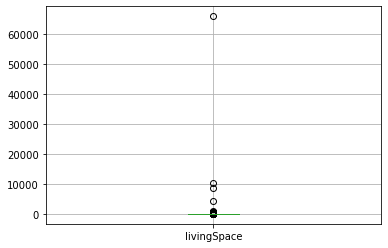

In [ ]:
df_final.boxplot('livingSpace')

In [ ]:
df_final[df_final['livingSpace'] > 20000]

,id,totalRent,serviceCharge,newlyConst,balcony,noRooms,kitchen,cellar,garden,livingSpace,energyEfficiencyClass_A,energyEfficiencyClass_B,energyEfficiencyClass_C_OR_LOWER,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,telekomTvOffer_nan,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_non_luxury_type,typeOfFlat_penthouse,typeOfFlat_terraced_flat,interiorQuality_luxury,interiorQuality_normal,interiorQuality_not_luxury,interiorQuality_nan,petsAllowed_no,petsAllowed_yes,numberOfFloors_0,numberOfFloors_1,numberOfFloors_2,numberOfFloors_3,numberOfFloors_4,numberOfFloors_more_than_5,numberOfFloors_nan,lastRefurbish_cat_new,lastRefurbish_cat_old,lastRefurbish_cat_very new,lastRefurbish_cat_very old,lastRefurbish_cat_nan,telekomUploadSpeed_cat_fast,telekomUploadSpeed_cat_slow,telekomUploadSpeed_cat_nan
151184,151185.1400.0 - Neubiberger_Straße 31 2.0 (Per...,1400.0,115.0,0,0,2,0,1,1,66100.0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0


#### Feature: serviceCharge

<AxesSubplot:>

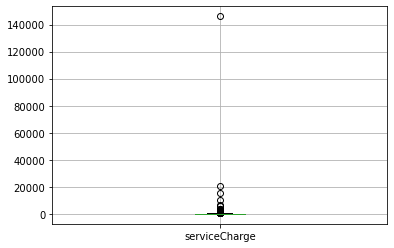

In [ ]:
df_final.boxplot('serviceCharge')

In [ ]:
df_final[df_final['serviceCharge'] > 40000]

,id,totalRent,serviceCharge,newlyConst,balcony,noRooms,kitchen,cellar,garden,livingSpace,energyEfficiencyClass_A,energyEfficiencyClass_B,energyEfficiencyClass_C_OR_LOWER,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,telekomTvOffer_nan,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_non_luxury_type,typeOfFlat_penthouse,typeOfFlat_terraced_flat,interiorQuality_luxury,interiorQuality_normal,interiorQuality_not_luxury,interiorQuality_nan,petsAllowed_no,petsAllowed_yes,numberOfFloors_0,numberOfFloors_1,numberOfFloors_2,numberOfFloors_3,numberOfFloors_4,numberOfFloors_more_than_5,numberOfFloors_nan,lastRefurbish_cat_new,lastRefurbish_cat_old,lastRefurbish_cat_very new,lastRefurbish_cat_very old,lastRefurbish_cat_nan,telekomUploadSpeed_cat_fast,telekomUploadSpeed_cat_slow,telekomUploadSpeed_cat_nan
25687,25688.794.29 - Gahlensche_Str. 129 1.0 (Hamme ...,794.29,146118.0,0,0,3,0,1,0,117.87,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


`serviceCharge` and `livingSpace` seems to be very rare outliers too. Discarded.

In [ ]:
df_final.loc[df_final['serviceCharge'] > 50000]

,id,totalRent,serviceCharge,newlyConst,balcony,noRooms,kitchen,cellar,garden,livingSpace,energyEfficiencyClass_A,energyEfficiencyClass_B,energyEfficiencyClass_C_OR_LOWER,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,telekomTvOffer_nan,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_non_luxury_type,typeOfFlat_penthouse,typeOfFlat_terraced_flat,interiorQuality_luxury,interiorQuality_normal,interiorQuality_not_luxury,interiorQuality_nan,petsAllowed_no,petsAllowed_yes,numberOfFloors_0,numberOfFloors_1,numberOfFloors_2,numberOfFloors_3,numberOfFloors_4,numberOfFloors_more_than_5,numberOfFloors_nan,lastRefurbish_cat_new,lastRefurbish_cat_old,lastRefurbish_cat_very new,lastRefurbish_cat_very old,lastRefurbish_cat_nan,telekomUploadSpeed_cat_fast,telekomUploadSpeed_cat_slow,telekomUploadSpeed_cat_nan
25687,25688.794.29 - Gahlensche_Str. 129 1.0 (Hamme ...,794.29,146118.0,0,0,3,0,1,0,117.87,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1


In [ ]:
# df_final = df_final.loc[df_final['livingSpace'] < 20000]
# df_final = df_final.loc[df_final['serviceCharge'] < 40000]

In [ ]:
df_final = remove_outliers_by_quantile(df_final, 'serviceCharge')
df_final = remove_outliers_by_quantile(df_final, 'livingSpace')
df_final = remove_outliers_by_quantile(df_final, 'noRooms')
df_final = remove_outliers_by_quantile(df_final, 'totalRent')

In [ ]:
df_final.describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
totalRent,199339.0,677.368077,297.857161,0.0,450.0,599.0,850.0,1558.41
serviceCharge,199339.0,134.002218,58.911526,0.0,90.0,130.0,170.0,331.76
livingSpace,199339.0,65.862706,21.309299,8.0,52.0,64.0,79.0,129.31
noRooms,199339.0,2.412077,0.817392,1.0,2.0,2.0,3.0,4.00
balcony,199339.0,0.594078,0.491071,0.0,0.0,1.0,1.0,1.00
telekomUploadSpeed_cat_fast,199339.0,0.599893,0.489921,0.0,0.0,1.0,1.0,1.00
interiorQuality_nan,199339.0,0.397699,0.489424,0.0,0.0,0.0,1.0,1.00
petsAllowed_no,199339.0,0.607563,0.488294,0.0,0.0,1.0,1.0,1.00
petsAllowed_yes,199339.0,0.392437,0.488294,0.0,0.0,0.0,1.0,1.00
interiorQuality_normal,199339.0,0.361976,0.480573,0.0,0.0,0.0,1.0,1.00


Later, I will explore what can infer with `description` and `facilities` with this instances

In [ ]:
df_model.groupby(['street'])['totalRent'].agg('median').sort_values(ascending=False).reset_index().round(2).head(5)

,street,totalRent
0,Schaller_Str.,64651.00
1,Ufnaustr._,51570.00
2,G._Hauptmann_Str.,31919.74
3,Potsdamer_Platz,26500.00
4,Oeltzenstraße,19519.00


In [ ]:
df_model.groupby(['regionLevel1'])['totalRent'].agg('median').sort_values(ascending=False).reset_index().round(2).head(5)

,regionLevel1,totalRent
0,Hamburg,1233.0
1,Berlin,1124.0
2,Baden_Württemberg,1020.0
3,Bayern,1020.0
4,Hessen,1010.0


In [ ]:
df_model.groupby(['regionLevel2'])['totalRent'].agg('median').sort_values(ascending=False).reset_index().round(2).head(5)

,regionLevel2,totalRent
0,München,1700.0
1,Freiburg_im_Breisgau,1550.0
2,Starnberg_Kreis,1500.0
3,München_Kreis,1467.5
4,Stuttgart,1400.0


In [ ]:
df_model.groupby(['regionLevel3'])['totalRent'].agg('median').sort_values(ascending=False).reset_index().round(2).head(5)

,regionLevel3,totalRent
0,Westheim,3500.0
1,Kinderhaus_West,2970.0
2,Hohenstadt,2700.0
3,Gatow_Spandau,2650.0
4,Grunewald_Wilmersdorf,2598.0


### Dataset exploration

#### Correlation matrix

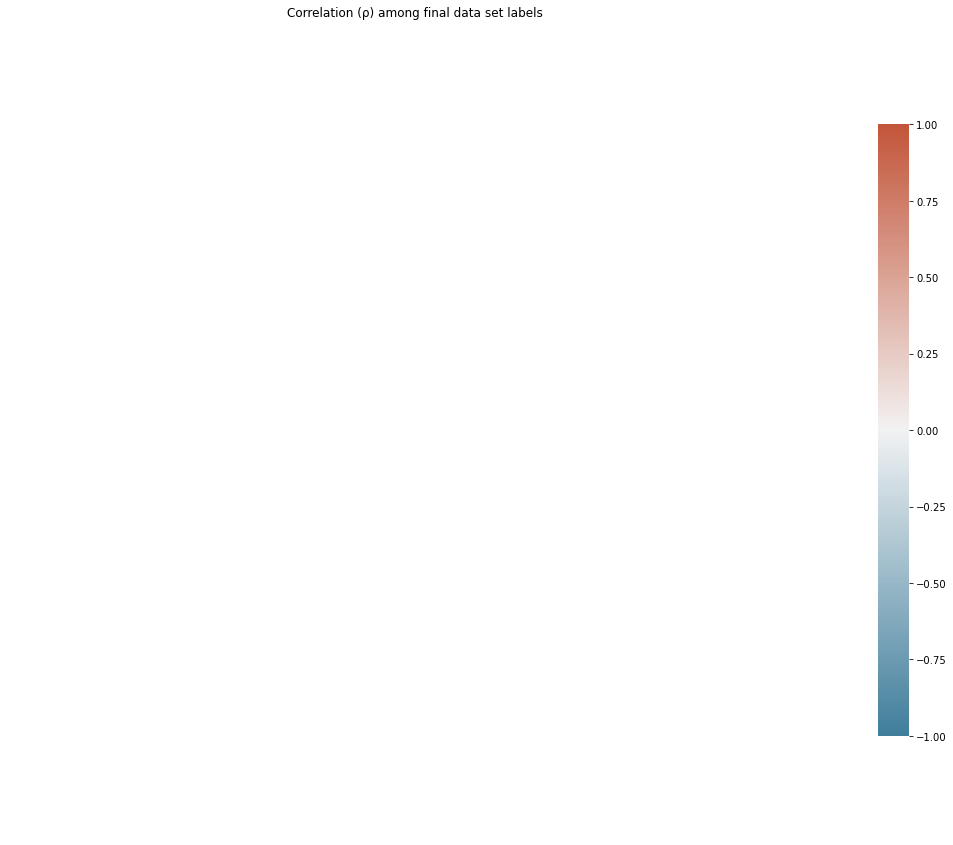

In [ ]:
correlation_heatmap(df_final, title='Correlation (ρ) among final data set labels', savefig_path='../reports/figures/correlation_heatmap_final.png')

In [ ]:
df_final.corr()['totalRent'].reset_index().sort_values(by='totalRent', ascending=False)

,index,totalRent
0,totalRent,1.000000
8,livingSpace,0.656404
1,serviceCharge,0.590601
4,noRooms,0.387954
22,interiorQuality_not_luxury,0.361570
2,newlyConst,0.326420
3,balcony,0.290234
5,kitchen,0.244019
20,interiorQuality_luxury,0.179307
9,energyEfficiencyClass_A,0.176668


In [ ]:
df.corr()['totalRent'].reset_index().sort_values(by='totalRent', ascending=False)

,index,totalRent
20,totalRent,1.000000
4,heatingCosts,0.126509
19,lastRefurbish,0.016373
0,lift,0.008710
1,postcode,0.006944
10,balcony,0.005945
13,noRooms,0.005255
11,yearConstructed,0.005034
5,electricityBasePrice,0.004596
3,serviceCharge,0.003954


#### Dataset reporting with dataprep

In [ ]:
# from dataprep.eda import create_report
# report = create_report(df_final_with_y, title='Rental property listings')
# report.save('/home/fpozoc/Desktop/rent/eda_postprocessing')

## Data splitting

In order to provide intelligent batches for train and testing, and also well distributed, lets check how states, cities, neighbourhods and streets are distributed by rent

#### Split data with well-distributed total rents by states

In [ ]:
df_model.groupby(['regionLevel1'])['totalRent'].agg('count').sort_values(ascending=False).reset_index().round(2).head(5)

,regionLevel1,totalRent
0,Sachsen,52170
1,Nordrhein_Westfalen,50759
2,Bayern,18521
3,Sachsen_Anhalt,17747
4,Hessen,14647


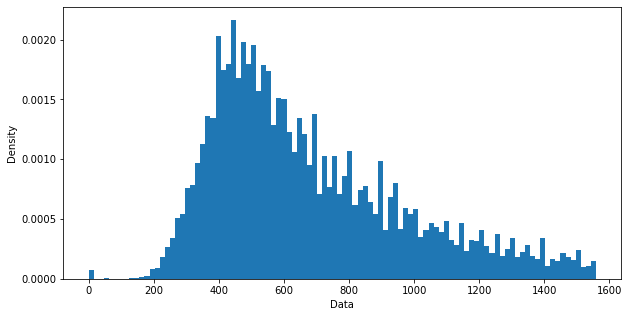

In [ ]:
plot_histogram(df_final['totalRent'], bins=100)

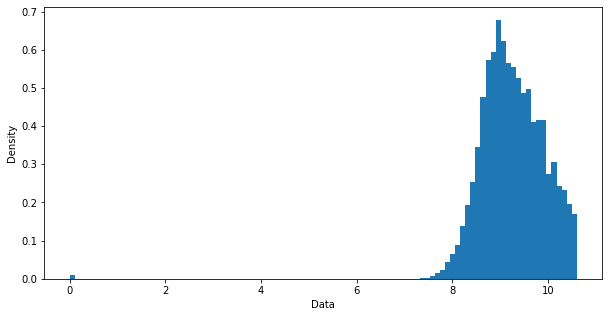

In [ ]:
plot_histogram(log2_conversion(df_final['totalRent'], how='forward', normalize=False), bins=100)

In [ ]:
# df_final['totalRent'] = log2_conversion(df_final['totalRent'], how='forward')

array([[<AxesSubplot:title={'center':'totalRent'}>,
        <AxesSubplot:title={'center':'serviceCharge'}>,
        <AxesSubplot:title={'center':'newlyConst'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'noRooms'}>,
        <AxesSubplot:title={'center':'kitchen'}>],
       [<AxesSubplot:title={'center':'cellar'}>,
        <AxesSubplot:title={'center':'garden'}>,
        <AxesSubplot:title={'center':'livingSpace'}>,
        <AxesSubplot:title={'center':'energyEfficiencyClass_A'}>,
        <AxesSubplot:title={'center':'energyEfficiencyClass_B'}>,
        <AxesSubplot:title={'center':'energyEfficiencyClass_C_OR_LOWER'}>],
       [<AxesSubplot:title={'center':'telekomTvOffer_ONE_YEAR_FREE'}>,
        <AxesSubplot:title={'center':'telekomTvOffer_ON_DEMAND'}>,
        <AxesSubplot:title={'center':'telekomTvOffer_nan'}>,
        <AxesSubplot:title={'center':'typeOfFlat_loft'}>,
        <AxesSubplot:title={'center':'typeOfFlat_maisonette'}>,
       

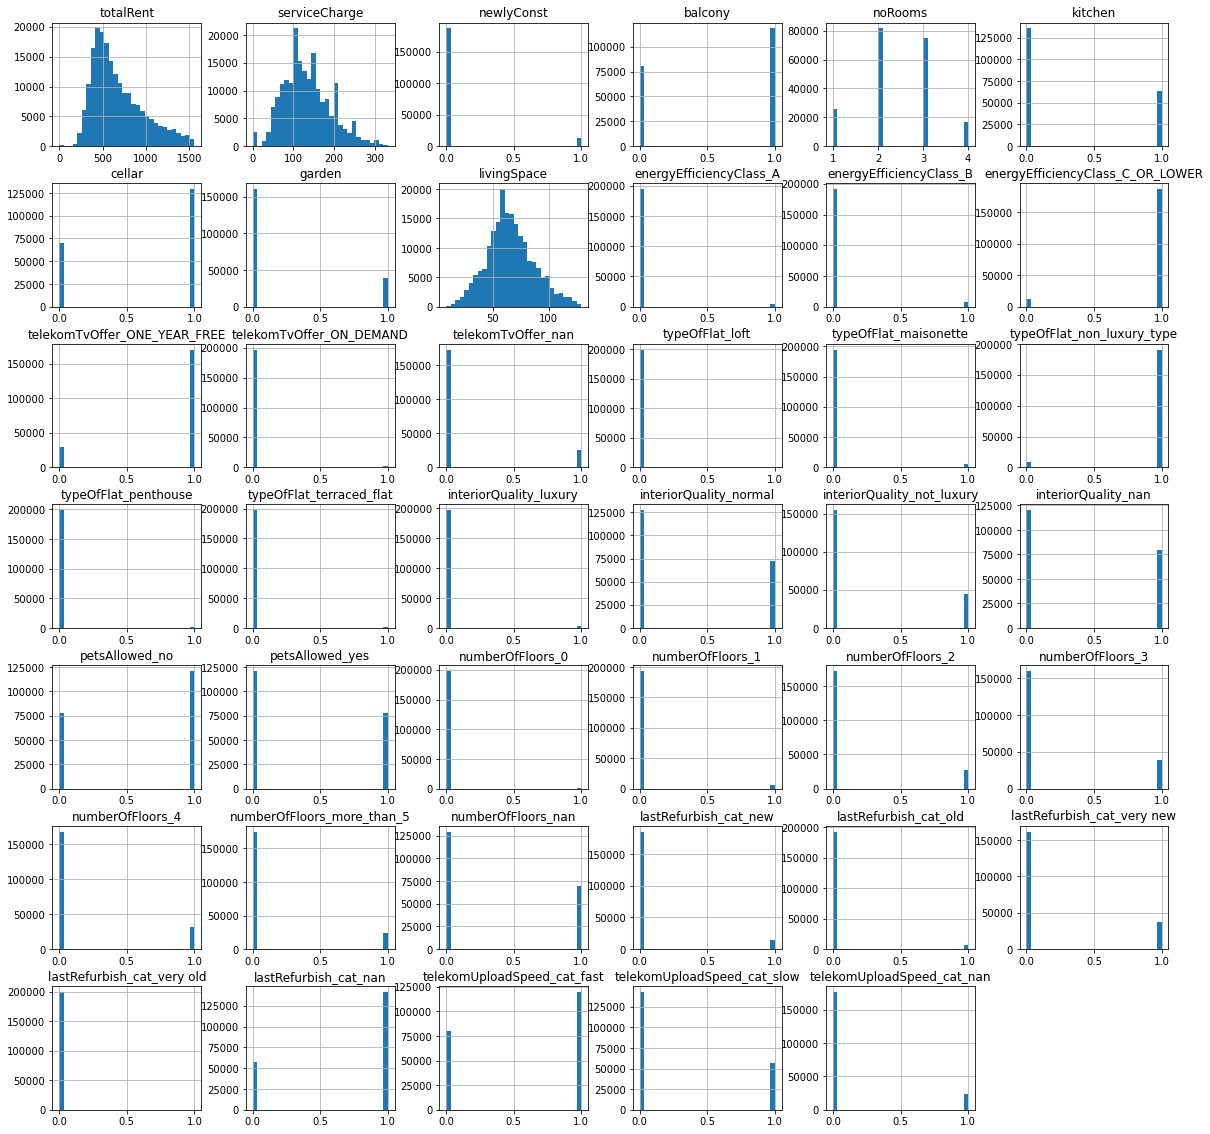

In [ ]:
df_final.hist(figsize=(20,20), bins=30)

In [ ]:
df_final.shape

(199339, 42)

In [ ]:
df_final.to_csv('../data/processed/training_set.v1.tsv.gz', sep='\t', compression='gzip', index=False)

In [ ]:
df_final_text = pd.merge(df_final, df[['description', 'facilities']], left_index=True, right_index=True)
df_final_text.to_csv('../data/processed/training_set.v2.tsv.gz', sep='\t', compression='gzip', index=False)